In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy import integrate, linalg

In [3]:
class Jin97Model():
    """Original Jin (1997a) model"""
    params = {'r': 0.25, 'alpha': 0.125, 'b0': 2.5, 'c': 1, 'gamma': 0.75}
    def __init__(self, mu, **kwargs):
        """
        Parameters
        ----------
        mu: float. The coupling coefficient.
        """
        self.mu = mu
    
    def matrix(self):
        return np.array([[-self.params['r'], -self.mu*self.params['alpha']*self.params['b0']], 
                           [self.params['gamma'], self.params['gamma']*self.mu*self.params['b0']-self.params['c']]])
    
    def fun(self, t, y):
        return self.matrix() @ y

**Q1** Compute numerically the eigenvalues of the Jin97 model and represent them as a function of $\mu$. Identify the regime where oscillatory solutions exist. Identify a critical value $\mu_c$ below which the sytem converges to $(0, 0)$ for all initial conditions, and above which it diverges for all initial conditions. Interpret this critical value in terms of the relaxation times for the two variables of the model.

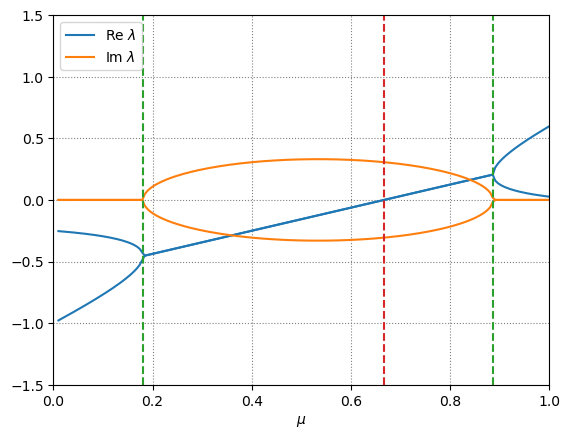

In [4]:
ax = plt.axes(xlabel=r'$\mu$', ylim=(-1.5, 1.5), xlim=(0, 1))
ax.grid(ls='dotted', color='grey')
muvec = np.linspace(0.01, 1, 200)
eigenvalues = np.array([linalg.eigvals(Jin97Model(mu).matrix()) for mu in muvec])
ax.plot(muvec, np.real(eigenvalues[:, 0]), color='C0', label=r'Re $\lambda$')
ax.plot(muvec, np.real(eigenvalues[:, 1]), color='C0')
ax.plot(muvec, np.imag(eigenvalues[:, 0]), color='C1', label=r'Im $\lambda$')
ax.plot(muvec, np.imag(eigenvalues[:, 1]), color='C1')
ax.axvline(x=0.18, color='C2', ls='dashed')
ax.axvline(x=0.887, color='C2', ls='dashed')
ax.axvline(x=2/3, color='C3', ls='dashed')
ax.legend();

For $\mu < 0.18$ we have two real and negative eigenvalues corresponding to two decaying modes. At $\mu\approx0.18$ (dashed green line) these two modes merge to form an oscillatory mode, which subsists until $\mu \approx 0.887$ (dashed green line), and for $\mu > 0.887$ there are again two real but this time positive eigenvalues, corresponding to amplifying modes.

The critical value of $\mu$ for which the real part of the eigenvalues vanishes is $\mu_c=2/3$. 
Below this value the amplitude of the anomalies decays, and the system has a fixed point at the origin.
On the other hand, it increases without bound for $\mu > \mu_c$, and the system diverges.

For $\mu=\mu_c$, $\gamma \mu b_0 -c=r=0.25$, the relaxation times for temperature and thermocline depth are the same.

**Q2** Plot trajectories for $h_W$ and $T_E$ for the following values of $\mu$: 0.1, 0.6, 0.7, 0.9. Check that it is qualitatively consistent with the analysis of the eigenvalues above.

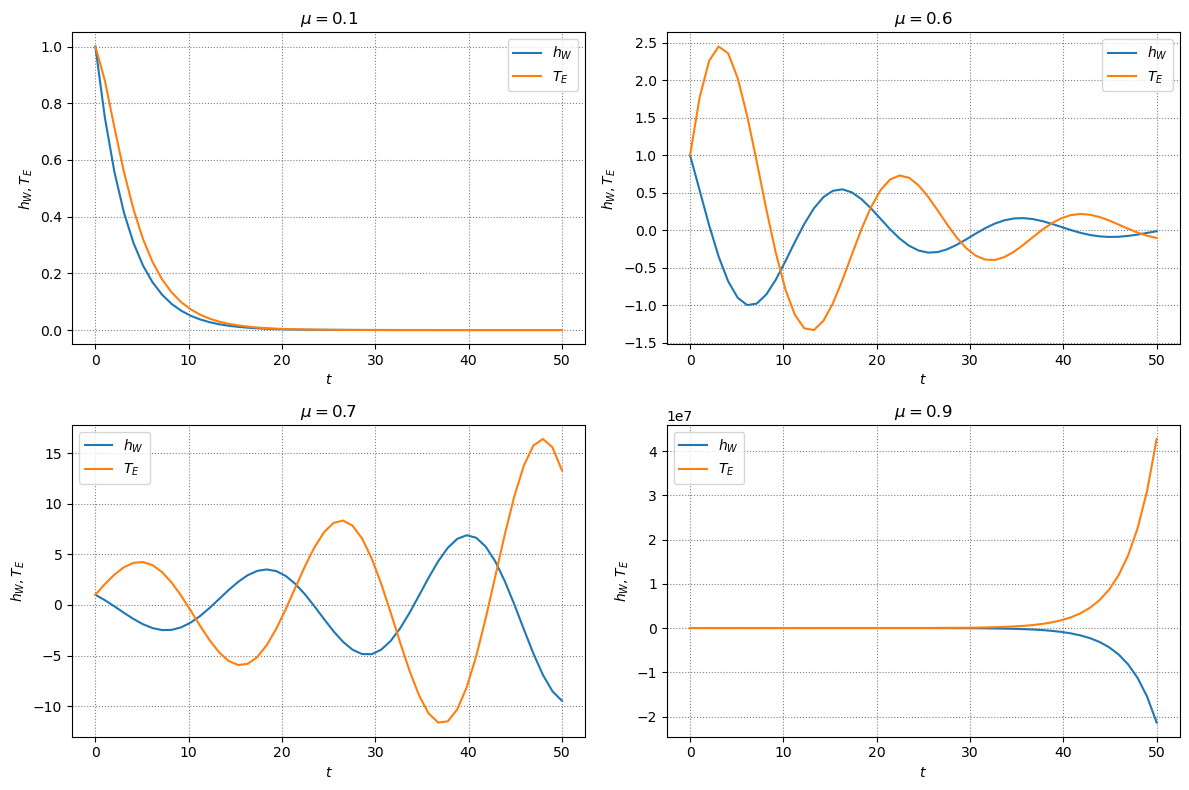

In [5]:
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
for ax in (ax1, ax2, ax3, ax4):
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$h_W, T_E$')
    ax.grid(ls='dotted', color='grey')
for mu, ax in zip((0.1, 0.6, 0.7, 0.9), (ax1, ax2, ax3, ax4)):
    sol = integrate.solve_ivp(Jin97Model(mu).fun, (0, 50), np.array([1, 1]), t_eval=np.linspace(0, 50))
    ax.plot(sol.t, sol.y[0, :], label=r'$h_W$')
    ax.plot(sol.t, sol.y[1, :], label=r'$T_E$')
    ax.set_title(f"$\mu=${mu}")
    ax.legend();
plt.tight_layout();

**Q3** Represent the streamlines of the vector field, for the same values of $\mu$. Conclude about the nature of the fixed points of the system.

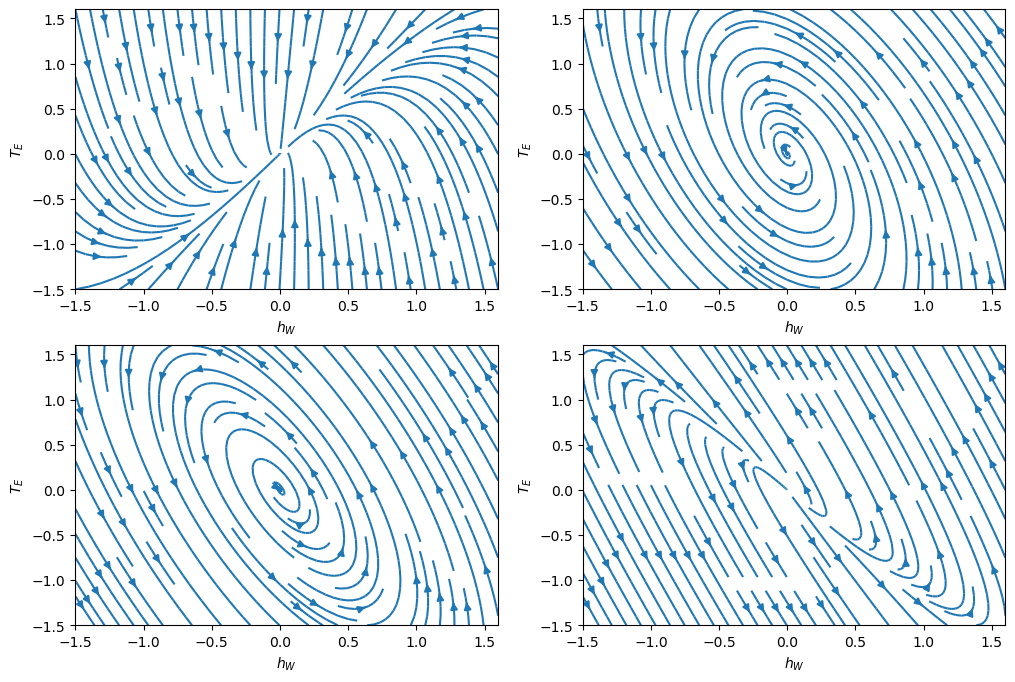

In [6]:
hvec = np.linspace(-1.5, 1.6)
Tvec = np.linspace(-1.5, 1.6)
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
for ax in (ax1, ax2, ax3, ax4):
    ax.set_xlabel(r'$h_W$')
    ax.set_ylabel(r'$T_E$')
for mu, ax in zip((0.1, 0.6, 0.7, 0.9), (ax1, ax2, ax3, ax4)):
    F = np.array([[Jin97Model(mu).fun(0, np.array([h, T])) for h in hvec] for T in Tvec])
    ax.streamplot(hvec, Tvec, F[:, :, 0], F[:, :, 1]);

The system always has a unique fixed point at $(0, 0)$.

For $\mu=0.1$, it is a stable node, for $\mu=0.6$ a stable focus, for $\mu=0.7$ an unstable focus and for $\mu=0.9$ an unstable node.

**Q4** Now plot a few trajectories for $\mu=2/3$. Check that they correspond to periodic orbits in phase space. Do all initial condition converge to the same periodic orbit? Does the period depend on the initial condition?

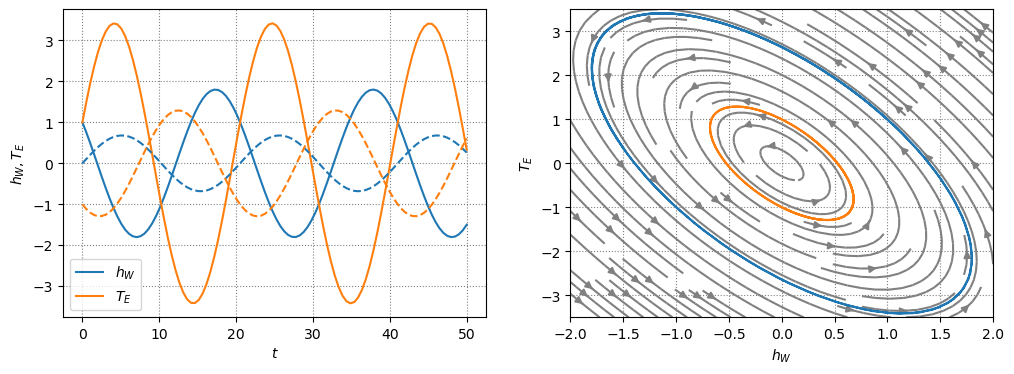

In [7]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$h_W, T_E$')
ax2.set_xlabel(r'$h_W$')
ax2.set_ylabel(r'$T_E$')
ax1.grid(ls='dotted', color='grey')
ax2.grid(ls='dotted', color='grey')

hvec = np.linspace(-2, 2.)
Tvec = np.linspace(-3.5, 3.5)
F = np.array([[Jin97Model(2/3).fun(0, np.array([h, T])) for h in hvec] for T in Tvec])
ax2.streamplot(hvec, Tvec, F[:, :, 0], F[:, :, 1], color='grey');

sol = integrate.solve_ivp(Jin97Model(2/3).fun, (0, 50), np.array([1, 1]), t_eval=np.linspace(0, 50, 100))
ax1.plot(sol.t, sol.y[0, :], label=r'$h_W$')
ax1.plot(sol.t, sol.y[1, :], label=r'$T_E$')
ax2.plot(sol.y[0, :], sol.y[1, :])

sol = integrate.solve_ivp(Jin97Model(2/3).fun, (0, 50), np.array([0, -1]), t_eval=np.linspace(0, 50, 100))
ax1.plot(sol.t, sol.y[0, :], color='C0', ls='dashed')
ax1.plot(sol.t, sol.y[1, :], color='C1', ls='dashed')
ax2.plot(sol.y[0, :], sol.y[1, :])

ax1.legend();

For all (non-zero) initial conditions, we have a periodic orbit, but there is no convergence to a single periodic attractor. The period does not depend on the initial conditions, because it is fixed by the imaginary part of the eigenvalues of the system.

**Q5** Now, plot on the same figure: temperature in the eastern equatorial Pacific, thermocline depth in the eastern and western equatorial Pacific (remember that in this model $h_E=h_W+\mu b_0T_E$). Identify the four phases of the discharge-recharge oscillator. Discuss the phase relations between these variables.

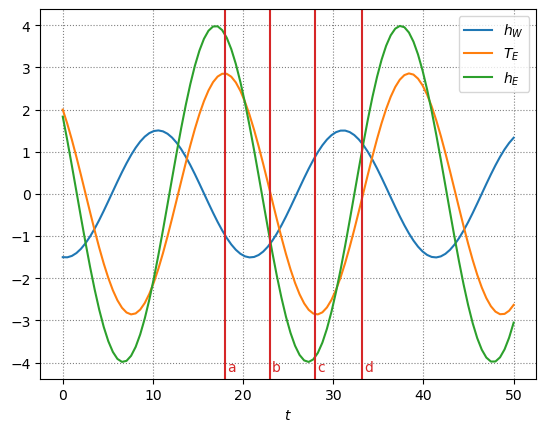

In [8]:
ax = plt.axes(xlabel=r'$t$')
ax.grid(ls='dotted', color='grey')
sol = integrate.solve_ivp(Jin97Model(2/3).fun, (0, 50), np.array([-1.5, 2]), t_eval=np.linspace(0, 50, 100))
ax.plot(sol.t, sol.y[0, :], label=r'$h_W$')
ax.plot(sol.t, sol.y[1, :], label=r'$T_E$')
ax.plot(sol.t, sol.y[0, :]+2/3*Jin97Model(2/3).params['b0']*sol.y[1, :], label=r'$h_E$')
ax.axvline(x=18, color='C3')
ax.text(18.2, -4.2, "a", color='C3')
ax.axvline(x=23, color='C3')
ax.text(23.2, -4.2, "b", color='C3')
ax.axvline(x=28, color='C3')
ax.text(28.2, -4.2, "c", color='C3')
ax.axvline(x=33.2, color='C3')
ax.text(33.4, -4.2, "d", color='C3')
ax.legend();

We identify the four phases based on the oscillation of temperature in the eastern equatorial Pacific:
a. $T_E$ is maximum.
b. $T_E=0$ and $T_E$ decreasing
c. $T_E$ is minimum
d. $T_E=0$ and $T_E$ increasing

Note that the wind stress anomaly $\tau$ is directly proportional to $T_E$ in this model, so the four phases above also correspond the the same behavior for $\tau$.

We note that, by construction, the extrema of $T_E$ (a and c) correspond to extrema of the thermocline slope $h_E-h_W$, and this slope vanishes when $T_E$ vanishes (b and d).

Now let us discuss the phase relations.
First, we observe that $h_E$ sligtly leads $T_E$. This points at the role of the thermocline feedback in controlling the sea surface temperature in the eastern equatorial Pacific.

On the other hand, $h_W$ and $T_E$ are out-of-phase, almost in quadrature. This is why oscillations appear.

The phase difference between $h_W$ and $h_E$ can be interpreted as the time taken for Rossby and Kelvin waves to propagate thermocline depth anomalies (like in the delayed-oscillator model), even if these processes are not represented explicitly.
